In [52]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import misc
from scipy import ndimage
import cv2

In [53]:
def display_images(features_images,labels,start, howmany):
    for i in range(start, start+howmany):
        plt.figure(i)
        plt.imshow(features_images[i], cmap=plt.get_cmap('gray'))
        plt.title(labels[i])
    plt.show()

## Rotate function for images in the dataset
Angle used: 90 Degree

In [54]:
def random_rotate_images(train_images,labels,start): #, howmany):
    for i in range(start, np.random.randint(0, high=len(train_labels_mo))):
        #img2 = features_images[i].rotate(45)
        train_images[i] = ndimage.rotate(train_images[i], 90)
        plt.figure(2)
        plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
        plt.title(labels[2])
    plt.show()

## Read dataset for Straight images

In [116]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

train_straight_images = np.asarray(mnist.train.images)
train_straight_labels = np.asarray(mnist.train.labels)
test_straight_images = np.asarray(mnist.test.images)
test_straight_labels = np.asarray(mnist.test.labels)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Reshape images to 28x28

In [72]:
train_reshaped_straight_images = train_straight_images.reshape(train_straight_images.shape[0],28,28)
test_reshaped_straight_images = test_straight_images.reshape(test_straight_images.shape[0],28,28)
print(train_straight_images.shape, train_straight_labels.shape, test_straight_images.shape,test_straight_labels.shape)

train_reshaped_straight_images.shape

(500, 784) (500,) (50, 784) (50,)


(500, 28, 28)

In [73]:
print(train_reshaped_straight_images.shape, train_straight_labels.shape, test_reshaped_straight_images.shape,test_straight_labels.shape)

(500, 28, 28) (500,) (50, 28, 28) (50,)


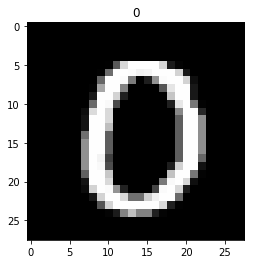

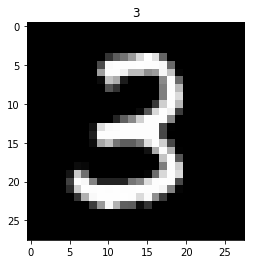

In [74]:
display_images(train_reshaped_straight_images, train_straight_labels, 10,2)

## Make set B for polar image
## Function transforming the image in polar coordinate

In [75]:
import numpy as np
from scipy.ndimage.interpolation import geometric_transform

def topolar(img, order=1):
    """
    Transform img to its polar coordinate representation.

    order: int, default 1
        Specify the spline interpolation order. 
        High orders may be slow for large images.
    """
    # max_radius is the length of the diagonal 
    # from a corner to the mid-point of img.
    max_radius = 0.5*np.linalg.norm( img.shape )

    def transform(coords):
        # Put coord[1] in the interval, [-pi, pi]
        theta = 2*np.pi*coords[1] / (img.shape[1] - 1.)

        # Then map it to the interval [0, max_radius].
        #radius = float(img.shape[0]-coords[0]) / img.shape[0] * max_radius
        radius = max_radius * coords[0] / img.shape[0]

        i = 0.5*img.shape[0] - radius*np.sin(theta)
        j = radius*np.cos(theta) + 0.5*img.shape[1]
        return i,j

    polar = geometric_transform(img, transform, order=order)

    rads = max_radius * np.linspace(0,1,img.shape[0])
    angs = np.linspace(0, 2*np.pi, img.shape[1])

    return polar, (rads, angs)

## The spectrum of the FFT on each ring describing the image
## First for training set

In [76]:
import matplotlib.pyplot as plt
i = 0  
spectrum_image = []

for eachimage in train_reshaped_straight_images:
    pol, (rads,angs) = topolar(eachimage)#train_straight_images[108])
    f = np.fft.fft2(pol)
    fshift = np.fft.fftshift(f) 
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    spectrum_image.append(magnitude_spectrum)
    i = i+1
print(i)

500


## Now for testing set

In [77]:
#from skimage.data import chelsea
import matplotlib.pyplot as plt
i = 0  
spectrum_image_testSet = []
#img = train_straight_images #chelsea()[...,0] / 255.
#img = cv2.imread("/Users/ganesh/Downloads/Lenna.png")
for eachimage in test_reshaped_straight_images:
    pol, (rads,angs) = topolar(eachimage)#train_straight_images[108])
    f = np.fft.fft2(pol)
    fshift = np.fft.fftshift(f) 
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    spectrum_image_testSet.append(magnitude_spectrum)
    i = i+1
print(i) 

50


In [78]:
np.array(spectrum_image).shape

(500, 28, 28)

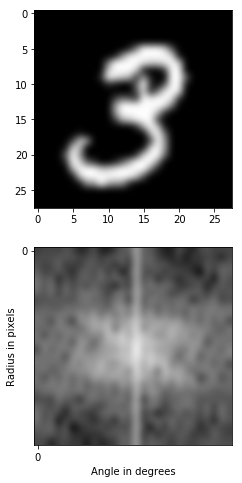

In [79]:
fig,ax = plt.subplots(2,1,figsize=(6,8))

ax[0].imshow(train_reshaped_straight_images[1], cmap=plt.cm.gray, interpolation='bicubic')

ax[1].imshow(spectrum_image[1], cmap=plt.cm.gray, interpolation='bicubic')

ax[1].set_ylabel("Radius in pixels")
ax[1].set_yticks(range(0, train_reshaped_straight_images[1].shape[0]+1, 50))
ax[1].set_yticklabels(rads[::50].round().astype(int))

ax[1].set_xlabel("Angle in degrees")
ax[1].set_xticks(range(0, train_reshaped_straight_images[1].shape[1]+1, 50))
ax[1].set_xticklabels((angs[::50]*180/3.14159).round().astype(int))

plt.show()

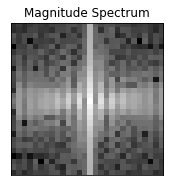

In [80]:
plt.subplot(121),plt.imshow(spectrum_image[75], cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Convert nparray to cv2 format images first and then calculate huMoment for both train and test set separately.
## Make set C for straight images

In [81]:
#Convert nparray to cv2 format images first and then calculate huMoment for both train and test set separately.

import os
import scipy.misc
i=0
train_set_hu_moment = []
test_set_hu_moment = []
for eachimage in train_reshaped_straight_images:
    im = np.array(eachimage * 255, dtype = np.uint8)
    threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    scipy.misc.imsave(os.path.join('HuMoment_train/','outfile'+ str(i) +'.jpg'), threshed)
    image = cv2.imread('HuMoment_train/'+ 'outfile'+ str(i) +'.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im = cv2.HuMoments(cv2.moments(image)).flatten()
    train_set_hu_moment.append(im)
    i=i+1

for eachimage in test_reshaped_straight_images:
    im = np.array(eachimage * 255, dtype = np.uint8)
    threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    scipy.misc.imsave(os.path.join('HuMoment_test/','outfile'+ str(i) +'.jpg'), threshed)
    image = cv2.imread('HuMoment_test/'+ 'outfile'+ str(i) +'.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im = cv2.HuMoments(cv2.moments(image)).flatten()
    test_set_hu_moment.append(im)
    i=i+1    
im.shape 

(7,)

In [82]:
(train_set_hu_moment[0])

array([  1.73260650e-03,   3.59334052e-07,   6.52112058e-10,
         2.30584645e-10,   9.55350523e-21,  -2.32200664e-14,
         8.89024008e-20])

In [83]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return (distance)

In [84]:
#Calculate Mahalanobis Distance 
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append((np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [85]:
import math
import operator
from collections import Counter

    
def getNeighbors(trainingSet, train_straight_labels,testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        dist = dist.tolist()
        distances.append((train_straight_labels[x], dist))
        #print(x)
        #print("ganesh",distances[0])
    #distances.tolist()    
    distances.sort(key = operator.itemgetter(1))
    
    #distances=np.asarray(distances)
    #sorted(distances, key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        #neighbors = np.asarray(neighbors) 
        #print(neighbors)
    return neighbors

#Neighbours for Mahalanobis distance case
def M_getNeighbors(trainingSet, train_straight_labels,testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        #dist = euclideanDistance(testInstance, trainingSet[x], length)
        dist = MahalanobisDist(testInstance,trainingSet[x])
        #dist = dist.tolist()
        distances.append((train_straight_labels[x], dist))   
    distances.sort(key = operator.itemgetter(1))

    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        #neighbors = np.asarray(neighbors)  
    return neighbors
    
def get_majority_vote(neighbours):
    # index 1 is the class
    #print(np.array(neighbours).shape)
    #classes = [neighbour[1] for neighbour in neighbours]
    for neighbour in neighbours:
        count = Counter(neighbours)
        
    #print(np.array(classes).shape)
    
    return count.most_common()[0][0] 
    
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

## Set A --Raw Pixels -- Prediction --Eucledean Distance

In [86]:
    predictions=[]
    k = 3
    for x in range(len(test_straight_images)):
        neighbors = getNeighbors(train_straight_images, train_straight_labels,test_straight_images[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions)
    print ('Accuracy: ', accuracy)

> predicted=7, actual=7
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=1, actual=1
> predicted=4, actual=4
> predicted=9, actual=9
> predicted=9, actual=5
> predicted=9, actual=9
> predicted=0, actual=0
> predicted=6, actual=6
> predicted=9, actual=9
> predicted=0, actual=0
> predicted=1, actual=1
> predicted=3, actual=5
> predicted=4, actual=9
> predicted=7, actual=7
> predicted=6, actual=3
> predicted=4, actual=4
> predicted=9, actual=9
> predicted=6, actual=6
> predicted=6, actual=6
> predicted=5, actual=5
> predicted=9, actual=4
> predicted=0, actual=0
> predicted=7, actual=7
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=1, actual=1
> predicted=3, actual=3
> predicted=1, actual=1
> predicted=3, actual=3
> predicted=0, actual=4
> predicted=7, actual=7
> predicted=2, actual=2
> predicted=7, actual=7
> predicted=1, actual=1
> predicted=1, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=7, a

## Set B 

In [87]:
setB_train = []
setB_test = []
for eachimage in spectrum_image:
    img1 = eachimage.flatten()
    setB_train.append(img1)
    
for eachimage in spectrum_image_testSet:
    img2 = eachimage.flatten()
    setB_test.append(img2) 

In [88]:
np.array(setB_train).shape
np.array(setB_test).shape


(50, 784)

## SET B--> Euclidean Distance

## Prediction for setB-->fft set and for Euclidean distance.

In [89]:
    predictions=[]
    k = 3
    for x in range(len(setB_test)):
        neighbors = getNeighbors(setB_train, train_straight_labels,setB_test[x], k)
        #result = getResponse(neighbors)
        #print(setB_test[x])
        #print(test_straight_labels[x])
        result = get_majority_vote(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions)
    print("x =",x)
    print ('Accuracy: ', accuracy)

x = 1000
Accuracy:  64.3


## Prediction for setC-->Hu Moment set and for Euclidean distance.

In [27]:
    predictions_hu=[]
    k = 3
    for x in range(len(test_set_hu_moment)):
        neighbors = getNeighbors(train_set_hu_moment,train_straight_labels,test_set_hu_moment[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions_hu.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions_hu)
    print("x =",x)
    print ('Accuracy: ', accuracy)
       

x = 1000
Accuracy:  74.2



/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Set A -- Predict Using Mahalanobis Distance

In [90]:
    predictions=[]
    k = 3
    for x in range(len(test_straight_images)):
        neighbors = M_getNeighbors(train_straight_images, train_straight_labels,test_straight_images[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions)
    print("x =",x)
    print ('Accuracy: ', accuracy)

x = 1000
Accuracy:  88.3


## Set B -- Predict Using Mahalanobis Distance

In [91]:
    predictions=[]
    k = 3
    for x in range(len(setB_test)):
        neighbors = M_getNeighbors(setB_train, train_straight_labels,setB_test[x], k)
        #result = getResponse(neighbors)
        #print(setB_test[x])
        #print(test_straight_labels[x])
        result = get_majority_vote(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions)
    print("x =",x)
    print ('Accuracy: ', accuracy)

x = 1000
Accuracy:  61.3


## Prediction for setC-->Hu Moment set and for Mahalanobis distance.

In [92]:
    predictions_hu=[]
    k = 3
    for x in range(len(test_set_hu_moment)):
        neighbors = getNeighbors(train_set_hu_moment,train_straight_labels,test_set_hu_moment[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions_hu.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions_hu)
    print("x =",x)
    print ('Accuracy: ', accuracy)
    

x = 1000
Accuracy:  68.4



/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Structural Similarity on set A

In [31]:
import sys
import numpy
from scipy import signal
from scipy import ndimage



def my_ssim(img1, img2, cs_map=False):
    """Return the Structural Similarity Map corresponding to input images img1 
    and img2 (images are assumed to be uint8)
    
    This function attempts to mimic precisely the functionality of ssim.m a 
    MATLAB provided by the author's of SSIM
    https://ece.uwaterloo.ca/~z70wang/research/ssim/ssim_index.m
    """
    img1 = img1.astype(numpy.float64)
    img2 = img2.astype(numpy.float64)
    size = 11
    sigma = 1.5
    window = cv2.getGaussianKernel(28,28)
    #window = gauss.fspecial_gauss(size, sigma)
    K1 = 0.01
    K2 = 0.03
    L = 255 #bitdepth of image
    C1 = (K1*L)**2
    C2 = (K2*L)**2
    mu1 = signal.fftconvolve(window, img1, mode='valid')
    mu2 = signal.fftconvolve(window, img2, mode='valid')
    mu1_sq = mu1*mu1
    mu2_sq = mu2*mu2
    mu1_mu2 = mu1*mu2
    sigma1_sq = signal.fftconvolve(window, img1*img1, mode='valid') - mu1_sq
    sigma2_sq = signal.fftconvolve(window, img2*img2, mode='valid') - mu2_sq
    sigma12 = signal.fftconvolve(window, img1*img2, mode='valid') - mu1_mu2
    if cs_map:
        return (((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                    (sigma1_sq + sigma2_sq + C2)), 
                (2.0*sigma12 + C2)/(sigma1_sq + sigma2_sq + C2))
    else:
        return ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                    (sigma1_sq + sigma2_sq + C2))

In [93]:
from skimage.measure import compare_ssim as ssim
def compareimages(imageA, imageB):
	# compute the mean squared error and structural similarity
	# index for the images
	s = ssim(imageA, imageB)
	return s

In [40]:
#sim = compare_images(train_reshaped_straight_images[0],train_reshaped_straight_images[1])
#print(s)

In [41]:

#s = my_ssim(train_reshaped_straight_images[0],train_reshaped_straight_images[1])
#print(s)

In [94]:
def getNeighbors_structSim(trainingSet,train_straight_labels, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        sim = compareimages(testInstance,trainingSet[x]) 
        #print("sim value" + str(x),sim)
        #dist = euclideanDistance(testInstance, trainingSet[x], length)
        sim = sim.tolist()
        distances.append((train_straight_labels[x], sim))   
    distances.sort(key = operator.itemgetter(1))
    

    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [95]:
    predictions=[]
    k = 3
    for x in range(len(test_reshaped_straight_images)):
        neighbors = getNeighbors_structSim(train_reshaped_straight_images,train_straight_labels, test_reshaped_straight_images[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions)
    print("x =",x)
    print ('Accuracy: ', accuracy)
   

x = 1000
Accuracy:  53.3



/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## IDMD Implementation.

In [44]:
def IDMD(imgA,imgB):
    w0 = 2
    w1 = 1 
    w2 = 1
    p = 2
    d = 0
    Nmin = imgA.min()
    Nmax = imgB.max()
    s1=[]
    #print(Nmin,Nmax)
    for i1 in range(Nmin, Nmax):
        for j1 in range(Nmin, Nmax):
            i5=1
            for i2 in range(-w0,w0):
                for j2 in range(-w0,w0):
                    s2=0
                    for i3 in range (-w1, w1):
                        for j3 in range (-w1, w1):
                            for i4 in range (1, w2):
                                v1 = imgA(i1 + i3, j1 + j3, i4)
                                v2 = imgB(i1 + i3 + i2, j1 + j3 + j2, i4)
                                s2 = s2 + abs(v1-v2)**p
                    #print(s2)            
                    s1.append(s2)#s1[i5]= s2
                    i5=i5+1
                    
            d = d + min(s1)
            
    return d

In [45]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

train_idmd_images = np.asarray(mnist.train.images[:1000],dtype=np.uint8)
train_idmd_labels = np.asarray(mnist.train.labels[:1000],dtype=np.uint8)
test_idmd_images = np.asarray(mnist.test.images[:10],dtype=np.uint8)
test_idmd_labels = np.asarray(mnist.test.labels[:10],dtype=np.uint8)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [46]:
train_idmd_images.max()

1

In [47]:
def getNeighbors_IDMD(trainingSet,train_straight_labels, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        idmd = IDMD(trainingSet[x],testInstance) 
        #print("sim value" + str(x),sim)
        #dist = euclideanDistance(testInstance, trainingSet[x], length)
        #idmd = idmd.tolist()
        distances.append((train_straight_labels[x], idmd))   
    distances.sort(key = operator.itemgetter(1))
    

    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [48]:
    predictions_idmd=[]
    k = 3
    for x in range(len(test_idmd_images)):
        #print(test_idmd_images)
        neighbors = getNeighbors_IDMD(train_idmd_images,train_idmd_labels, test_idmd_images[x], k)
        result = get_majority_vote(neighbors)
        predictions_idmd.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_idmd_labels[x]))
    accuracy = getAccuracy(test_idmd_labels, predictions_idmd)
    print ('Accuracy: ', accuracy)
    #print(predictions_idmd)

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(test_idmd_labels, predictions_idmd)) 

> predicted=7, actual=7
> predicted=7, actual=2
> predicted=7, actual=1
> predicted=7, actual=0
> predicted=7, actual=4
> predicted=7, actual=1
> predicted=7, actual=4
> predicted=7, actual=9
> predicted=7, actual=5
> predicted=7, actual=9
Accuracy:  10.0
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         1
          7       0.10      1.00      0.18         1
          9       0.00      0.00      0.00         2

avg / total       0.01      0.10      0.02        10



/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Read Dataset for Multi-Oriented Images Separately


In [96]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

train_images_mo = np.asarray(mnist.train.images[:1000],dtype=np.float64)#dtype=np.float)
train_labels_mo = np.asarray(mnist.train.labels[:1000],dtype=np.float64)
test_images_mo = np.asarray(mnist.test.images[:500],dtype=np.float64)
test_labels_mo = np.asarray(mnist.test.labels[:500],dtype=np.float64)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [97]:
# show the sizes of each data split
print("training data points: {}".format(len(train_labels_mo)))
print("test data points: {}".format(len(test_images_mo)))
print("testing label points: {}".format(len(test_labels_mo)))

training data points: 1000
test data points: 500
testing label points: 500


## Reshape images to 28x28

In [98]:
train_reshaped_images_mo = train_images_mo.reshape(train_images_mo.shape[0],28,28)
test_reshaped_images_mo = test_images_mo.reshape(test_images_mo.shape[0],28,28)
print(train_reshaped_images_mo.shape, train_labels_mo.shape, test_reshaped_images_mo.shape,test_labels_mo.shape,train_images_mo.shape,test_images_mo.shape)


(1000, 28, 28) (1000,) (500, 28, 28) (500,) (1000, 784) (500, 784)


## Calling Random function for changing the orientation of the images in the dataset

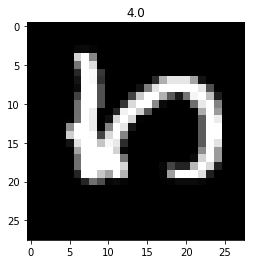

In [99]:
random_rotate_images(train_reshaped_images_mo, train_labels_mo, 1)

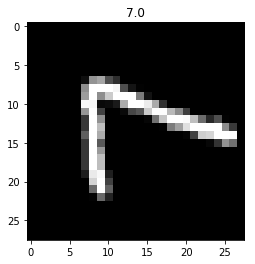

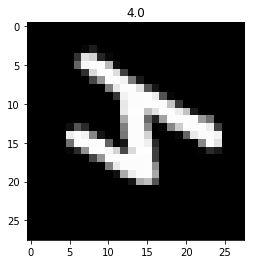

In [100]:
display_images(train_reshaped_images_mo, train_labels_mo, 100,2)

In [101]:
def random_rotate_testimages(test_images,labels,start): #, howmany):
    for i in range(start, np.random.randint(0, high=len(test_labels_mo))):
        #img2 = features_images[i].rotate(45)
        test_images[i] = ndimage.rotate(test_images[i], 90)
        plt.figure(2)
        plt.imshow(test_images[3], cmap=plt.get_cmap('gray'))
        plt.title(labels[3])
    plt.show()

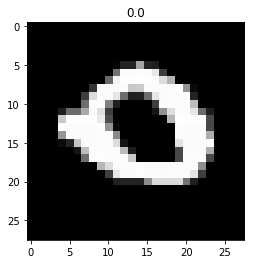

In [102]:
random_rotate_testimages(test_reshaped_images_mo, test_labels_mo, 0)

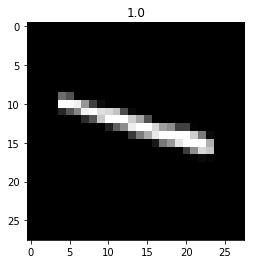

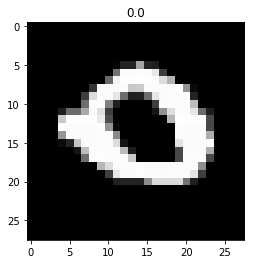

In [103]:
display_images(test_reshaped_images_mo, test_labels_mo, 2,2)

## Set B -- fft for polar coordiantes
## First for training set

In [104]:
import matplotlib.pyplot as plt
i = 0  
spectrum_image_trainset_mo = []

for eachimage in train_reshaped_images_mo:
    pol, (rads,angs) = topolar(eachimage)#train_straight_images[108])
    f = np.fft.fft2(pol)
    fshift = np.fft.fftshift(f) 
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    spectrum_image_trainset_mo.append(magnitude_spectrum)
    i = i+1
print(i) 

1000


## Secondly for testing set 

In [105]:
import matplotlib.pyplot as plt
i = 0  
spectrum_image_testSet_mo = []
#img = train_straight_images #chelsea()[...,0] / 255.
#img = cv2.imread("/Users/ganesh/Downloads/Lenna.png")
for eachimage in test_reshaped_images_mo:
    pol, (rads,angs) = topolar(eachimage)#train_straight_images[108])
    f = np.fft.fft2(pol)
    fshift = np.fft.fftshift(f) 
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    spectrum_image_testSet_mo.append(magnitude_spectrum)
    i = i+1
print(i) 

500


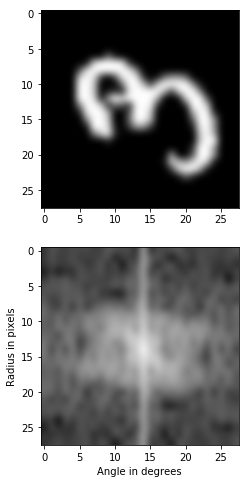

In [106]:
fig,ax = plt.subplots(2,1,figsize=(6,8))

ax[0].imshow(train_reshaped_images_mo[1], cmap=plt.cm.gray, interpolation='bicubic')

ax[1].imshow(spectrum_image_trainset_mo[1], cmap=plt.cm.gray, interpolation='bicubic')
ax[1].set_ylabel("Radius in pixels")
#ax[1].set_yticks(range(0, train_reshaped_images_mo[1].shape[0]+1, 50))
#ax[1].set_yticklabels(rads[::50].round().astype(int))

ax[1].set_xlabel("Angle in degrees")
#ax[1].set_xticks(range(0, train_reshaped_images_mo[1].shape[1]+1, 50))
#ax[1].set_xticklabels((angs[::50]*180/3.14159).round().astype(int))


plt.show()

In [107]:
ax[1].set_ylabel("Radius in pixels")
ax[1].set_yticks(range(0, train_reshaped_images_mo[1].shape[0]+1, 50))
ax[1].set_yticklabels(rads[::50].round().astype(int))

ax[1].set_xlabel("Angle in degrees")
ax[1].set_xticks(range(0, train_reshaped_images_mo[1].shape[1]+1, 50))
ax[1].set_xticklabels((angs[::50]*180/3.14159).round().astype(int))

[Text(0,0,'0')]

## Convert nparray to cv2 format images first and then calculate huMoment for both train and test set separately.
## Make set C for Multi-Oriented images

In [108]:
#Convert nparray to cv2 format images first and then calculate huMoment for both train and test set separately.

import os
import scipy.misc
i=0
train_set_hu_moment_mo = []
test_set_hu_moment_mo = []
for eachimage in train_reshaped_images_mo:
    im = np.array(eachimage * 255, dtype = np.uint8)
    threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    scipy.misc.imsave(os.path.join('HuMoment_train_Mo/','outfile'+ str(i) +'.jpg'), threshed)
    image = cv2.imread('HuMoment_train_Mo/'+ 'outfile'+ str(i) +'.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im = cv2.HuMoments(cv2.moments(image)).flatten()
    train_set_hu_moment_mo.append(im)
    i=i+1

for eachimage in test_reshaped_images_mo:
    im = np.array(eachimage * 255, dtype = np.uint8)
    threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    scipy.misc.imsave(os.path.join('HuMoment_test_Mo/','outfile'+ str(i) +'.jpg'), threshed)
    image = cv2.imread('HuMoment_test_Mo/'+ 'outfile'+ str(i) +'.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im = cv2.HuMoments(cv2.moments(image)).flatten()
    test_set_hu_moment_mo.append(im)
    i=i+1    
im.shape 

(7,)

In [109]:
(test_set_hu_moment_mo[1])

array([  2.07116237e-03,   8.53716548e-07,   2.85014678e-09,
         2.14050115e-10,  -1.08528456e-19,  -1.97586606e-13,
         1.27175554e-19])

## Multi-Oriented Set A --Raw Pixels -- Prediction --Eucledean Distance

In [2]:
    predictions_mo=[]
    k = 3
    for x in range(len(test_reshaped_images_mo)):
        neighbors = getNeighbors(train_reshaped_images_mo, train_labels_mo,test_reshaped_images_mo[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions_mo.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_labels_mo[x]))
    accuracy = getAccuracy(test_labels_mo, predictions_mo)
    print ('Accuracy: ', accuracy)

x = 1000
Accuracy:  93.6


## Set B for Multi- Oriented

In [110]:
setB_train_mo = []
setB_test_mo = []
for eachimage in spectrum_image_trainset_mo:
    img1 = eachimage.flatten()
    setB_train_mo.append(img1)
    
for eachimage in spectrum_image_testSet_mo:
    img2 = eachimage.flatten()
    setB_test_mo.append(img2) 

In [111]:
np.array(setB_train_mo).shape
#np.array(setB_test_mo).shape

(1000, 784)

## Prediction for Multi-Oriented setB-->fft set using Euclidean distance.

In [112]:
    predictions_mo_setB=[]
    k = 3
    for x in range(len(setB_test_mo)):
        neighbors = getNeighbors(setB_train_mo, train_labels_mo,setB_test_mo[x], k)
        #result = getResponse(neighbors)
        #print(setB_test[x])
        #print(test_straight_labels[x])
        result = get_majority_vote(neighbors)
        predictions_mo_setB.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(test_labels_mo[x]))
    accuracy = getAccuracy(test_straight_labels, predictions_mo_setB)
    print ('Accuracy: ', accuracy)

> predicted=2.0, actual=7.0
> predicted=8.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=4.0, actual=4.0
> predicted=1.0, actual=1.0
> predicted=8.0, actual=4.0
> predicted=9.0, actual=9.0
> predicted=7.0, actual=5.0
> predicted=9.0, actual=9.0
> predicted=0.0, actual=0.0
> predicted=6.0, actual=6.0
> predicted=9.0, actual=9.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=5.0, actual=5.0
> predicted=9.0, actual=9.0
> predicted=2.0, actual=7.0
> predicted=9.0, actual=3.0
> predicted=9.0, actual=4.0
> predicted=5.0, actual=9.0
> predicted=9.0, actual=6.0
> predicted=5.0, actual=6.0
> predicted=5.0, actual=5.0
> predicted=4.0, actual=4.0
> predicted=0.0, actual=0.0
> predicted=7.0, actual=7.0
> predicted=4.0, actual=4.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=3.0, actual=3.0
> predicted=1.0, actual=1.0
> predicted=8.0, actual=3.0
> predicted=2.0, actual=4.0
> predicted=7.0, actual=7.0
> predicted=2.0, act

> predicted=2.0, actual=2.0
> predicted=0.0, actual=0.0
> predicted=7.0, actual=4.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=9.0, actual=2.0
> predicted=8.0, actual=8.0
> predicted=2.0, actual=4.0
> predicted=7.0, actual=7.0
> predicted=1.0, actual=1.0
> predicted=9.0, actual=2.0
> predicted=4.0, actual=4.0
> predicted=0.0, actual=0.0
> predicted=4.0, actual=2.0
> predicted=7.0, actual=7.0
> predicted=4.0, actual=4.0
> predicted=6.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=9.0, actual=3.0
> predicted=1.0, actual=1.0
> predicted=9.0, actual=9.0
> predicted=6.0, actual=6.0
> predicted=4.0, actual=5.0
> predicted=9.0, actual=2.0
> predicted=9.0, actual=5.0
> predicted=7.0, actual=9.0
> predicted=2.0, actual=2.0
> predicted=9.0, actual=9.0
> predicted=6.0, actual=3.0
> predicted=0.0, actual=0.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=2.0
> predicted=0.0, actual=0.0
> predicted=7.0, act

## Prediction for Multi-Oriented setC-->Hu Moment set using Euclidean distance.

In [113]:
    predictions_hu_mo=[]
    k = 3
    for x in range(len(test_set_hu_moment)):
        neighbors = getNeighbors(train_set_hu_moment_mo,train_labels_mo,test_set_hu_moment_mo[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions_hu_mo.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_labels_mo[x]))
    accuracy = getAccuracy(test_labels_mo, predictions_hu_mo)
    print("x =",x)
    print ('Accuracy: ', accuracy)
     

x = 1000
Accuracy:  71.2


## Multi-Oriented setA --Mahalanobis Distance

In [114]:
    predictions_MB=[]
    k = 3
    for x in range(len(test_reshaped_images_mo)):
        neighbors = M_getNeighbors(train_reshaped_images_mo, train_labels_mo,test_reshaped_images_mo[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions_MB.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_labels_mo[x]))
    accuracy = getAccuracy(test_labels_mo, predictions_MB)
    print("x =",x)
    print ('Accuracy: ', accuracy)

x = 1000
Accuracy:  71.2


## Multi-Oriented setB --Mahalanobis Distance

In [115]:
    Predictions_mo_setB=[]
    k = 3
    for x in range(len(setB_test_mo)):
        neighbors = M_getNeighbors(setB_train_mo, train_labels_mo,setB_test_mo[x], k)
        #result = getResponse(neighbors)
        #print(setB_test[x])
        #print(test_straight_labels[x])
        result = get_majority_vote(neighbors)
        Predictions_mo_setB.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_labels_mo[x]))
    accuracy = getAccuracy(test_labels_mo, Predictions_mo_setB)
    print ('Accuracy: ', accuracy)

> predicted=2.0, actual=7.0
> predicted=0.0, actual=2.0
> predicted=6.0, actual=1.0
> predicted=4.0, actual=0.0
> predicted=0.0, actual=4.0
> predicted=6.0, actual=1.0
> predicted=8.0, actual=4.0
> predicted=2.0, actual=9.0
> predicted=0.0, actual=5.0
> predicted=7.0, actual=9.0
> predicted=3.0, actual=0.0
> predicted=2.0, actual=6.0
> predicted=9.0, actual=9.0
> predicted=2.0, actual=0.0
> predicted=5.0, actual=1.0
> predicted=0.0, actual=5.0
> predicted=8.0, actual=9.0
> predicted=0.0, actual=7.0
> predicted=5.0, actual=3.0
> predicted=7.0, actual=4.0
> predicted=0.0, actual=9.0
> predicted=3.0, actual=6.0
> predicted=3.0, actual=6.0
> predicted=6.0, actual=5.0
> predicted=3.0, actual=4.0
> predicted=6.0, actual=0.0
> predicted=0.0, actual=7.0
> predicted=0.0, actual=4.0
> predicted=1.0, actual=0.0
> predicted=7.0, actual=1.0
> predicted=0.0, actual=3.0
> predicted=5.0, actual=1.0
> predicted=9.0, actual=3.0
> predicted=2.0, actual=4.0
> predicted=2.0, actual=7.0
> predicted=3.0, act

> predicted=0.0, actual=2.0
> predicted=5.0, actual=0.0
> predicted=7.0, actual=4.0
> predicted=6.0, actual=0.0
> predicted=2.0, actual=0.0
> predicted=6.0, actual=2.0
> predicted=0.0, actual=8.0
> predicted=3.0, actual=4.0
> predicted=2.0, actual=7.0
> predicted=7.0, actual=1.0
> predicted=3.0, actual=2.0
> predicted=8.0, actual=4.0
> predicted=9.0, actual=0.0
> predicted=0.0, actual=2.0
> predicted=3.0, actual=7.0
> predicted=9.0, actual=4.0
> predicted=8.0, actual=3.0
> predicted=6.0, actual=3.0
> predicted=3.0, actual=0.0
> predicted=4.0, actual=0.0
> predicted=5.0, actual=3.0
> predicted=8.0, actual=1.0
> predicted=4.0, actual=9.0
> predicted=6.0, actual=6.0
> predicted=5.0, actual=5.0
> predicted=2.0, actual=2.0
> predicted=0.0, actual=5.0
> predicted=3.0, actual=9.0
> predicted=7.0, actual=2.0
> predicted=1.0, actual=9.0
> predicted=0.0, actual=3.0
> predicted=0.0, actual=0.0
> predicted=2.0, actual=4.0
> predicted=1.0, actual=2.0
> predicted=2.0, actual=0.0
> predicted=4.0, act

## Multi-Oriented setC --Mahalanobis Distance

In [116]:
    predictions_hu_C=[]
    k = 3
    for x in range(len(test_set_hu_moment_mo)):
        neighbors = M_getNeighbors(train_set_hu_moment_mo,train_labels_mo,test_set_hu_moment_mo[x], k)
        #result = getResponse(neighbors) 
        result = get_majority_vote(neighbors)
        predictions_hu_C.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(test_straight_labels[x]))
    accuracy = getAccuracy(test_straight_labels, predictions_hu_C)
    print("x =",x)
    print ('Accuracy: ', accuracy)
    

x = 1000
Accuracy:  66.4
